# Beaufort Gyre freshwater diagnoses

In [1]:
import glob
import datetime
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [3]:
#for i in range(100):
#    print('mv FWC_ANHA4_ALL'+format(i, '02d')+'.mat '+'FWC_ANHA4_ALL'+format(i, '03d')+'.mat')

In [3]:
ETOPO2_Arctic=scipy.io.loadmat('../../_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('../../_libs/ETOPO2_CAA.mat')

#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']

res_unit=3
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 

In [4]:
Ba_FName = '/ocean/yingkai/GEOTRACES/Simulations/BARIUM01_1m_20020101_20140103_ptrc_T.nc'
U_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vozocrtx_monmean.nc'
V_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/vomecrty_monmean.nc'
S_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'
H_FName = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/sossheig_monmean.nc'

ptrc_obj = nc.Dataset(Ba_FName)
u_obj = nc.Dataset(U_FName)
v_obj = nc.Dataset(V_FName)
s_obj = nc.Dataset(S_FName)
h_obj = nc.Dataset(H_FName)

nav_lat=ptrc_obj.variables['nav_lat'][:]
nav_lon=ptrc_obj.variables['nav_lon'][:]

In [5]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

# Dissloved Barium concentration

In [33]:
lev1 = np.arange(34, 96, 4)

In [36]:
def plot_Ba(nav_lon, nav_lat, lev1, time_step, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    tempBa = ptrc_obj.variables['Ba'][time_step, :20, :, :]
    tempBa[tempBa==0]=np.nan
    
    CS=proj.contourf(x, y, np.nanmean(tempBa, 0), lev1, cmap=cm.GMT_haxby_r, extend='both')
    proj.contour(topox, topoy, topo_arctic, [1000], colors=('gray',), linewidths=1.5)
    #proj.contour(x, y, ptrc_obj.variables['Ba'][time_step, L, :, :], lev1, linewidths=0.5, colors=('gray',))
    ax.set_title('Time: '+date_list[time_step].strftime("%Y-%m-%d"), fontsize=15)
    return CS, proj

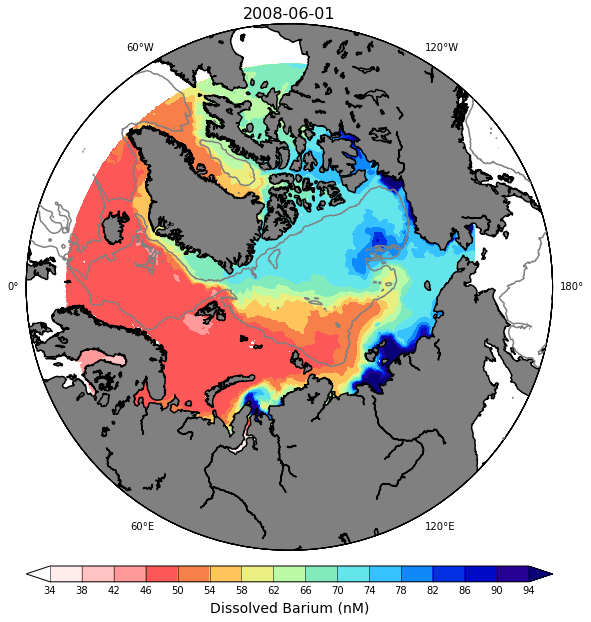

In [59]:
for i in range(77, 78):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    CS, proj = plot_Ba(nav_lon, nav_lat, lev1, i, ax)
    ax.set_title(date_list[i].strftime("%Y-%m-%d"), fontsize=16)
CBar=proj.colorbar(CS, location='bottom', size='3%', pad='3%', ticks=lev1)
CBar.set_label('Dissolved Barium (nM)', fontsize=14)
CBar.ax.tick_params(axis='x', length=16)

# Sea surface height

In [45]:
lev4 = np.arange(-1, 0.1, 0.1)

In [46]:
def plot_ssh(nav_lon, nav_lat, lev1, time_step, ax):
    H = h_obj.variables['sossheig'][time_step, :, :]

    proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True, ax=ax)
    #proj = Basemap(llcrnrlon=-93.7, llcrnrlat=60, urcrnrlon=-66.1, urcrnrlat=90, projection='lcc', 
    #               lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    proj.contour(topox, topoy, topo_arctic, [1000], colors=('gray',), linewidths=1.5)
    CS = proj.contourf(x, y, H, lev1, cmap=plt.cm.jet, extend='both')
    return CS, proj

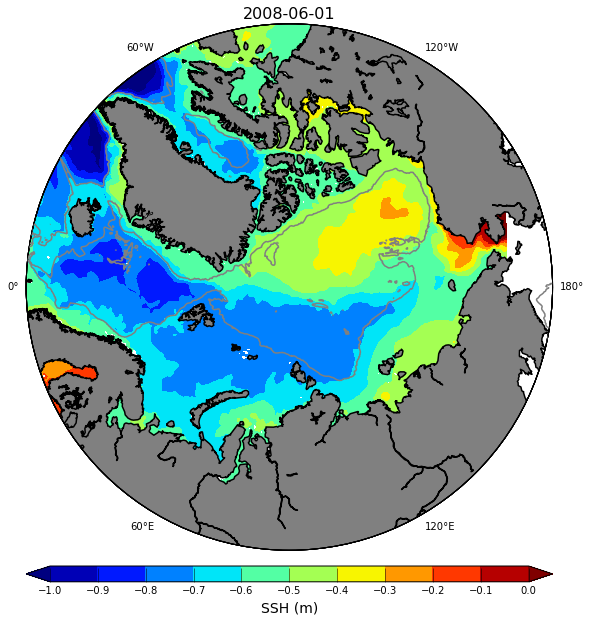

In [58]:
for i in range(77, 78):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    CS, proj = plot_ssh(nav_lon, nav_lat, lev4, i, ax)
    ax.set_title(date_list[i].strftime("%Y-%m-%d"), fontsize=16)
CBar=proj.colorbar(CS, location='bottom', size='3%', pad='3%', ticks=lev4)
CBar.set_label('SSH (m)', fontsize=14)
CBar.ax.tick_params(axis='x', length=14)

# Sea surface salinity

In [12]:
lev2 = np.arange(26, 39, 1)

In [48]:
def plot_saline(nav_lon, nav_lat, lev1, time_step, ax):
    S = s_obj.variables['isssalin'][time_step, :, :]

    proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True, ax=ax)
    #proj = Basemap(llcrnrlon=-93.7, llcrnrlat=60, urcrnrlon=-66.1, urcrnrlat=90, projection='lcc', 
    #               lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    proj.contour(topox, topoy, topo_arctic, [1000], colors=('gray',), linewidths=1.5)
    CS = proj.contourf(x, y, S, lev1, cmap=plt.cm.jet, extend='both')
    return CS, proj

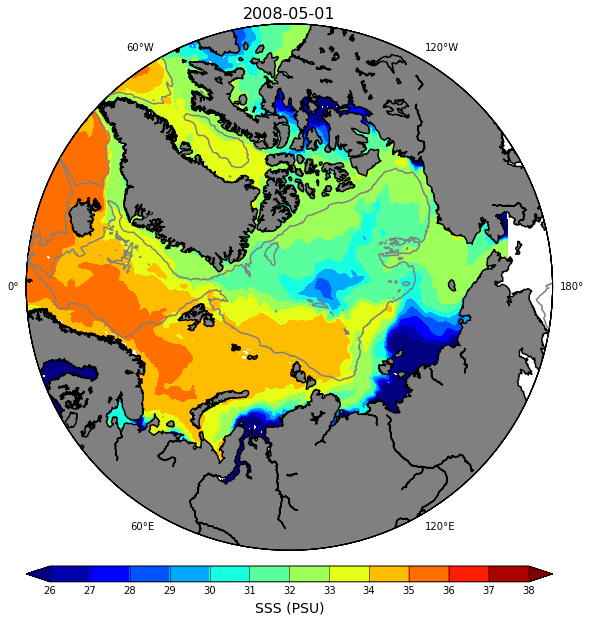

In [57]:
for i in range(76, 77):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    CS, proj = plot_saline(nav_lon, nav_lat, lev2, i, ax)
    ax.set_title(date_list[i].strftime("%Y-%m-%d"), fontsize=16)
CBar=proj.colorbar(CS, location='bottom', size='3%', pad='3%', ticks=lev2)
CBar.set_label('SSS (PSU)', fontsize=14)
CBar.ax.tick_params(axis='x', length=16)

# Freshwater Content

In [73]:
def plot_fwc(nav_lon, nav_lat, lev1, time_step, ax):
    proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=90, round=True, ax=ax)
    #proj = Basemap(llcrnrlon=-93.7, llcrnrlat=60, urcrnrlon=-66.1, urcrnrlat=90, projection='lcc', 
    #               lat_1=30., lat_2=60., lat_0=34.83158, lon_0=-98.)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    topox, topoy=proj(lon_arctic, lat_arctic)
    proj.contour(topox, topoy, topo_arctic, [1000], colors=('gray',), linewidths=1.5)
    CS = proj.contourf(x, y, FWC[time_step, :, :], lev1, cmap=plt.cm.jet, extend='max')
    return CS, proj

In [112]:
FWC_name0 = '../../_data/MAT files/FWC/FWC_ANHA4_77.mat'
FWC = np.zeros([1, 800, 544])

MAT0 = scipy.io.loadmat(FWC_name0)
FWC0 = MAT0['FWC'][:]

FWC[0, :, :] = FWC0
lev_fwc = np.arange(0, 22, 2)

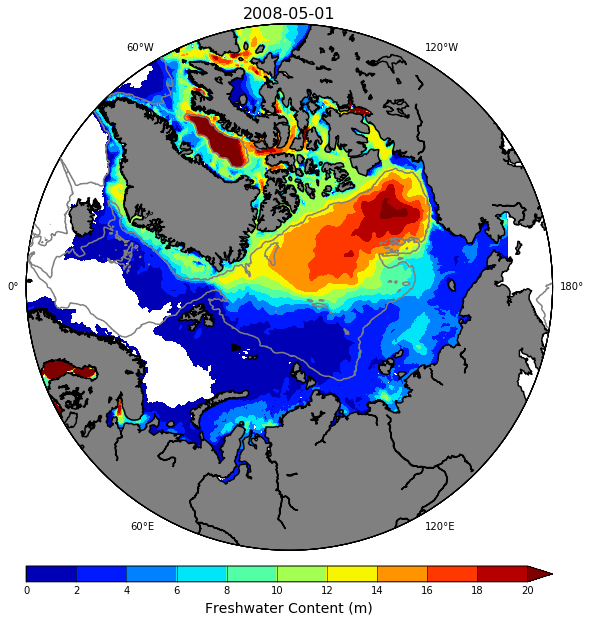

In [113]:
for i in range(76, 77):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.gca()
    CS, proj = plot_fwc(nav_lon, nav_lat, lev_fwc, i-76, ax)
    ax.set_title(date_list[i].strftime("%Y-%m-%d"), fontsize=16)
CBar=proj.colorbar(CS, location='bottom', size='3%', pad='3%', ticks=lev_fwc)
CBar.set_label('Freshwater Content (m)', fontsize=14)
CBar.ax.tick_params(axis='x', length=16)

# U/V Currents

In [161]:
lev3 = np.arange(-0.1, 0.12, 0.02)

In [156]:
def plot_uv(nav_lon, nav_lat, lev1, lev2, time_step, ax):
    U = u_obj.variables['vozocrtx'][time_step, :, :]
    V = v_obj.variables['vomecrty'][time_step, :, :]
    
    ax1 = plt.subplot2grid((1, 2), (0, 0), colspan=1, rowspan=1)
    ax2 = plt.subplot2grid((1, 2), (0, 1), colspan=1, rowspan=1)
    #ax = fig.gca()

    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax1)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    x, y=proj(nav_lon, nav_lat)
    CS1=proj.contourf(x, y, U, lev1, cmap=cm.GMT_no_green, extend='both')
    ax1.set_title('(a) zonal')
    

    proj=Basemap(projection='npstere', resolution='l', boundinglat=55, lon_0=90, round=True, ax=ax2)
    proj.drawmeridians(np.arange(0, 360, 60), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
    proj.fillcontinents(color=[0.5, 0.5, 0.5], lake_color=None)
    proj.drawcoastlines(linewidth=1.5, color='k')
    CS2=proj.contourf(x, y, V, lev1, cmap=cm.GMT_no_green, extend='both')
    ax2.set_title('(b) meridional')
    
    return CS1, CS2, proj

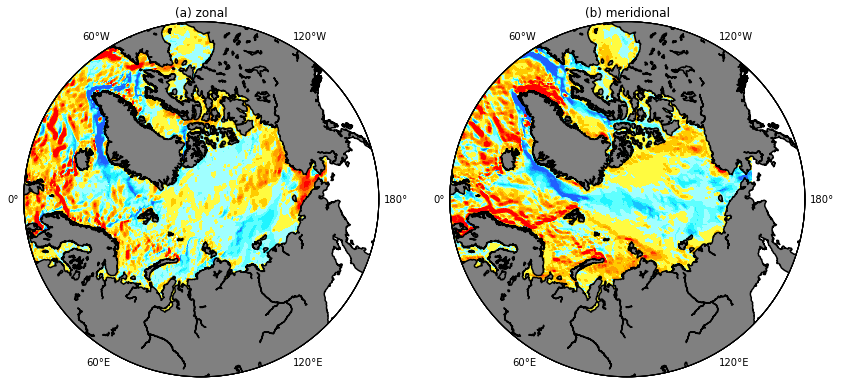

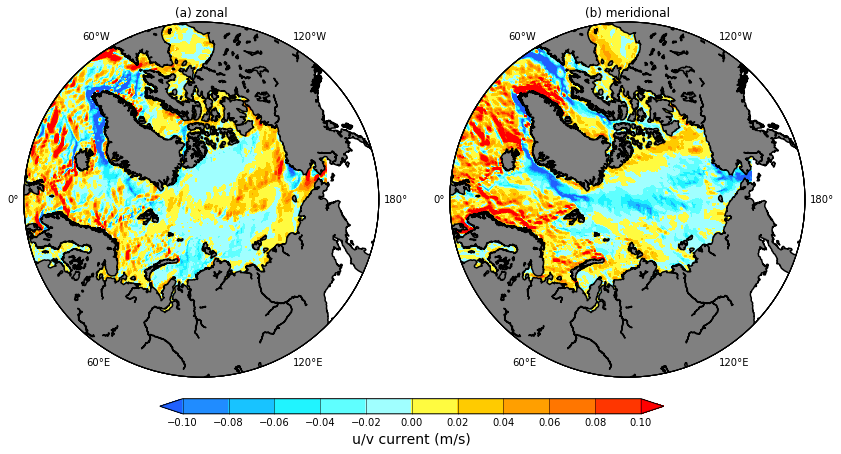

In [162]:
for i in range(74, 76):
    fig = plt.figure(figsize=(14, 14))
    ax = fig.gca()
    CS1, CS2, proj = plot_uv(nav_lon, nav_lat, lev3, lev3, i, ax)
    ax.set_title(date_list[i])
    
cax = fig.add_axes([0.26, 0.3, 0.5, 0.015])
CBar = fig.colorbar(CS1, cax=cax, orientation='horizontal')
CBar.set_label('u/v current (m/s)', fontsize=14)
CBar.ax.tick_params(axis='x', length=16)
CBar.set_ticks(lev3)